In [1]:
# _*_ coding: utf-8 _*_
import os
import math
import csv
import pandas as pd
from glob import iglob
from IPython.display import display
from functools import reduce
import import_ipynb
import sentencepiece as spm

from CommonModule.Handle_Dir import mkdir_p, del_folder
from CommonModule.ArticleHandler import Article, ArticleReader

importing Jupyter notebook from /data/ksb/TestSampleDir/articleSummary-Jupyter/Data-Preprocessing/CommonModule/Handle_Dir.ipynb
importing Jupyter notebook from /data/ksb/TestSampleDir/articleSummary-Jupyter/Data-Preprocessing/CommonModule/ArticleHandler.ipynb


In [3]:
BASE_DIR = "/data/ksb"
DATA_BASE_DIR = os.path.join(BASE_DIR, 'sample_articles')
SRC_BASE_DIR = os.path.join(BASE_DIR, 'TestSampleDir')

ORIGIN_PATH = os.path.join(DATA_BASE_DIR,"Origin-Data")
PREPROCESSED_PATH = os.path.join(DATA_BASE_DIR,"Preprocessed-Data")
PRETTY_PATH = os.path.join(DATA_BASE_DIR,"Pretty-Data")
SWORDS_PATH = os.path.join(DATA_BASE_DIR, "StopWordList.txt")

WORD_ENCODING_DIR = os.path.join(os.path.join(SRC_BASE_DIR, 'articleSummary-Jupyter'), 'Word-Encoding-Model')


In [4]:
def get_media_name(filepath):
    filename = filepath.split(os.sep)[-1]
    return filename.split(".")[0]

In [5]:
def is_small_text(lines):
    if not lines : return True
    return False

In [6]:
def is_small_title(title):
    if title is '' : return True
    return False

In [7]:
from CommonModule.TextPreprocessor import TextPreprocessor
preprocessor = TextPreprocessor()
preprocessor.loadSwords(SWORDS_PATH)

importing Jupyter notebook from /data/ksb/TestSampleDir/articleSummary-Jupyter/Data-Preprocessing/CommonModule/TextPreprocessor.ipynb


['아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를 들면',
 '예를 들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '해서는 안된다',
 '뿐만 아니라',
 '만이 아니다',
 '만은 아니다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지 않다',
 '따지지 않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '한다면 몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게 함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼마나',
 '얼마만큼',
 '얼마큼',
 '남짓',
 '여',
 '얼마간',
 '약간',
 '다소',
 '좀',
 '조

In [402]:
get_line_token_count = lambda sent : len(sent.split())
get_token_count = lambda sents : reduce(lambda x, y : x + y, map(get_line_token_count, sents))

In [25]:
sp_src = spm.SentencePieceProcessor()
model_num = len(list(iglob(os.path.join(WORD_ENCODING_DIR, 'spm-input-*.vocab'), recursive=False))) -1
sp_src.Load(os.path.join(WORD_ENCODING_DIR, 'spm-input-{}.model').format(model_num))


True

In [26]:
model_num = len(list(iglob(os.path.join(WORD_ENCODING_DIR, 'spm-input-*.vocab'), recursive=False))) -1
model_num


3

In [9]:
get_line_token_count = lambda sent : len(sp_src.encode_as_ids(sent))
get_token_count = lambda sents : reduce(lambda x, y : x + y, map(get_line_token_count, sents))

In [10]:
if __name__ == '__main__':
    
    
    processed_dist = pd.DataFrame(columns=['Media','Title', 'Contents', 'Token Number'])
    title_proc_dist = pd.DataFrame(columns=['Media', 'Title', 'Contents', 'Token Number'])
    
    for idx, media_path in enumerate(iglob(os.path.join(ORIGIN_PATH, '**.csv'), recursive=False)):

        media_name = get_media_name(media_path)
        preprocessed_path = os.path.join(PREPROCESSED_PATH, media_name) + ".csv"
        print(media_name, preprocessed_path)
        
        f = open(media_path, 'r', newline="\n", encoding="utf-8")

        for [_, title, contents] in csv.reader(f):
            
            article = Article(title, media_name, contents.split("\t"))
            
            try:
                contents = list(article.readContent())

                clean_conts = preprocessor.del_personal_info(contents, media_name)
                clean_conts = preprocessor.cleanLines(clean_conts)
                clean_title = preprocessor.cleanLine(article.title)
                
                

                if is_small_text(clean_conts) or is_small_title(clean_title): continue
                # Article Preprocessed Title
                title_proc= {'Media': media_name,'Title' : article.title, 'Contents' : clean_title , 'Token Number' : get_line_token_count(clean_title)}
                title_proc_dist = title_proc_dist.append(title_proc, ignore_index=True)
                    
                # Preprocessed Article
                proc = {'Media': media_name, 'Title' : article.title, 'Contents' : '\t'.join(clean_conts), 'Token Number' : get_token_count(clean_conts)}
                processed_dist = processed_dist.append(proc, ignore_index=True)
                    
            except Exception as err:
                print(err)
                print("Drop Article : {title}".format(title=article.title))
                pass
        
        print(len(processed_dist))
        if len(processed_dist) >= 30000 :
            break
        f.close()

KBS /data/ksb/sample_articles/Preprocessed-Data/KBS.csv
42523


In [18]:
for _, dist in processed_dist.iterrows():
    print(dist['Media'])
    print(dist['Title'])
    print(dist['Contents'].split('\t'))
    break

KBS
‘한파 속 내복 차림’ 3세 여아…경찰, 상습 방임 여부 조사
['지난 8일 오후 5시 40분쯤 서울 강북구의 한 편의점 내복 차림으로 거리로 나온 3살짜리 여자아이가 주민에게 발견됐습니다', '이날 서울에는 최저기온 영하 18 6의 강추위가 몰아쳤습니다', '아이를 발견한 행인은 아이를 옷으로 감싼 채 편의점 안으로 들어왔습니다', '여성은 아이를 진정시키기 위해 따뜻한 음료를 건네며 경찰을 기다렸습니다', '당시 아이의 내복은 대소변으로 젖어있습니다', '모습을 목격한 편의점 관계자는 취재진과 만나 처음엔 상황을 잘 몰라서 애가 추위를 많이 타는구나 그렇게만 생각했다 면서 20여 분 만에 경찰이 왔다 고 말했습니다', '지난 달에도 아이를 목격한 편의점 관계자는 경찰에 사실을 전달했습니다', '관계자는 손목에 엄마의 휴대전화 번호가 적힌 인식표가 있어서 전화했던 기록이 있었다 면서 엄마가 마트 갔다고 그러는데 엄마가 안 오니까 애 겁에 질렸는지 엄청 울면서 왔었다 고 말했습니다', '신고를 받고 출동한 경찰은 아동보호전문기관과 출동했고 퇴근 중이던 아이의 엄마와 만났습니다', '당시 아이는 엄마가 출근한 뒤 9시간쯤 있었고 집 밖으로 나왔다가 출입문 비밀번호를 몰라 집 안으로 들어가지 못한 것으로 파악됐습니다', '이후 집에서 50여 미터 정도 떨어진 편의점 서성이다 행인에게 발견됐습니다', '아이와 같은 건물에 사는 한 주민은 지난해 9월쯤 이사 온 것으로 기억한다 면서 아이와 엄마를 자주 보지는 못했고 예전에 자전거를 타고 들어오는 걸 본 적이 고 말했습니다', '그러면서 가끔 집 안에서 아이가 웃는 소리도 들리긴 했는데 자주 마주치지는 못했다 고 덧붙였습니다', '경찰은 아이의 엄마 A 씨를 아동복지법상 유기 방임 혐의로 입건했습니다', '아이는 심리적 안정을 위해 분리 조치를 해 친척 집으로 보냈습니다', 'A 씨는 어제 경찰 조사에서 학대는 오해라면서 반성하고 있다고 말한 것으로 알려졌습니다', '경찰은 A 씨가 방임 등으로 신고된 적은 없

In [27]:
sent= '지난 8일 오후 5시 40분쯤 서울 강북구의 한 편의점 내복 차림으로 거리로 나온 3살짜리 여자아이가 주민에게 발견됐습니다'
print(sp_src.encode_as_pieces(sent))

['▁지난', '▁8', '일', '▁오후', '▁5', '시', '▁40', '분쯤', '▁서울', '▁강북구의', '▁한', '▁편의점', '▁내', '복', '▁차림으로', '▁거리로', '▁나온', '▁3', '살짜리', '▁여자아이가', '▁주민에게', '▁발견됐습니다']


In [ ]:
display(pd.DataFrame(processed_dist))

In [ ]:
display(pd.DataFrame(title_proc_dist))

In [11]:
processed_dist['Token Number'] = processed_dist['Token Number'].astype('float64')
title_proc_dist['Token Number'] = title_proc_dist['Token Number'].astype('float64')

In [12]:
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
from scipy.spatial import distance
import sys

NORM_SKEW = 0
NORM_KURT = 3

def get_normal_dist(dist):
    
    min_distance = sys.float_info.max 
    min_distance_idx = -1
    for idx in range(len(dist)):
        tmp_dist = dist[:idx]
        
        tmp_skew = tmp_dist.skew()
        tmp_kurt = tmp_dist.kurt()
        
        if np.isnan(tmp_skew) or np.isnan(tmp_kurt) : continue
        
        graph_distance = distance.euclidean((NORM_SKEW, NORM_KURT), (tmp_skew, tmp_kurt))
        if graph_distance < min_distance:
            min_distance = graph_distance
            min_distance_idx = idx
            
    return min_distance_idx
    

In [46]:
token_len_filter = processed_dist['Token Number'] >= 10 
get_normal_dist(processed_dist[token_len_filter]['Token Number'])

12

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Token Number', ylabel='Density'>

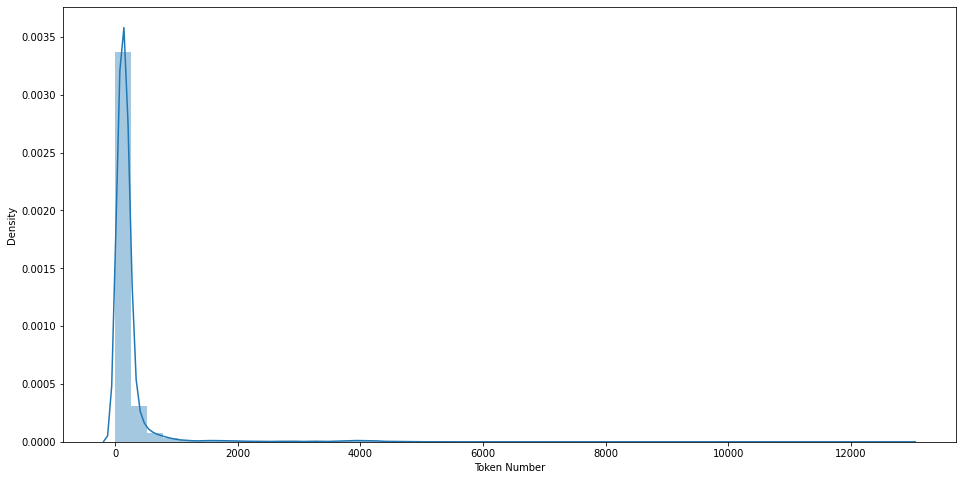

In [21]:
sns.distplot(processed_dist['Token Number'])

Token Distribution : 0.6931471805599453 ~ 9.462032506694808
Token Distribution Mean : 4.910

Variance : 0.75 
Standard Devidation: 0.87

95% Confidence Interval : 113.41 ~ 159.80
99% Confidence Interval : 107.42 ~ 168.70


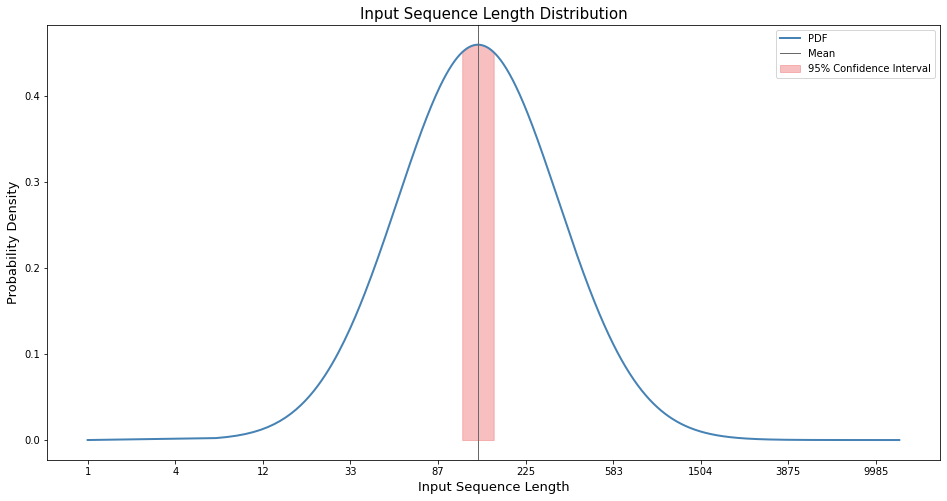

In [22]:
processed_dist["Log Token Number"] = np.log1p(processed_dist['Token Number'])

plt.rcParams["figure.figsize"] = (16,8)

# ax = sns.distplot(processed_dist["Log Token Number"], hist=False)
# sns.distplot(processed_dist["Log Token Number"], fit_kws={"color":"dodgerblue"},
#             kde=False, fit=stats.gamma, label="label 1")

log_token_max = np.max(processed_dist["Log Token Number"])
log_token_min = np.min(processed_dist["Log Token Number"])

log_token_var = np.var(processed_dist['Log Token Number'])
log_token_std = np.std(processed_dist['Log Token Number'])
log_token_mean = np.mean(processed_dist['Log Token Number'])

print("Token Distribution : {} ~ {}".format(log_token_min, log_token_max))
print("Token Distribution Mean : {:.3f}\n".format(log_token_mean))
print("Variance : {:.2f} \nStandard Devidation: {:.2f}\n".format(log_token_var, log_token_std))
# print("Skew : {:.2f} \nKurt : {:.2f}".format(log_token_skew, log_token_kurt))

x = sorted(processed_dist['Log Token Number'])
norm_dist = stats.norm(log_token_mean, log_token_std)

log_L_95 = log_token_mean - 1.96*(log_token_std/np.sqrt(100))
log_U_95 = log_token_mean + 1.96*(log_token_std/np.sqrt(100))
print("95% Confidence Interval : {:.2f} ~ {:.2f}".format(np.expm1(log_L_95), np.expm1(log_U_95)))

log_L_99 = log_token_mean - 2.58*(log_token_std/np.sqrt(100))
log_U_99 = log_token_mean + 2.58*(log_token_std/np.sqrt(100))
print("99% Confidence Interval : {:.2f} ~ {:.2f}".format(np.expm1(log_L_99), np.expm1(log_U_99)))

# log_token_mean = np.log1p(token_mean)
# log_L_95 = np.log1p(L_95)
# log_U_95 = np.log1p(U_95)

pdf_line, = plt.plot(x, norm_dist.pdf(x), color='steelblue', linewidth=2)

mean_line = plt.axvline(x=log_token_mean, color='dimgray', linewidth=1)

# plt.axvline(log_L_95, color='r', linestyle='--', linewidth=1)
# plt.axvline(log_U_95, color='r', linestyle='--', linewidth=1)

# plt.text(log_L_95-.2,.5,"{}".format(int(np.exp(log_L_95))), rotation=0)
# plt.text(log_U_95,.5,"{}".format(int(np.exp(log_U_95))), rotation=0)
# plt.text(log_token_mean +.02, .27,"{}".format(int(np.exp(log_token_mean))), rotation=0)

step = 0.01
# plt.fill_between(np.arange(log_token_min, log_L_95, step=step).tolist(), 
#                  [norm_dist.pdf(i) for i in np.arange(log_token_min , log_L_95, step=step)], alpha=0.5, color='steelblue') 
confidence_area = plt.fill_between(np.arange(log_L_95 , log_U_95, step=step).tolist(), 
                 [norm_dist.pdf(i) for i in np.arange(log_L_95 , log_U_95, step=step)], alpha=0.5, color='lightcoral')
# plt.fill_between(np.arange(log_U_95 , log_token_max, step=step).tolist(), 
#                  [norm_dist.pdf(i) for i in np.arange(log_U_95 , log_token_max, step=step)], alpha=0.5, color='steelblue') 

x_range = np.arange(log_token_min, log_token_max, step=log_token_max / 10).tolist()
x_range.sort()

plt.title("Input Sequence Length Distribution", fontsize=15)

plt.xticks(x_range, \
           ["{}".format(int(np.expm1(x))) for x in x_range])

y_range = np.arange(np.min(norm_dist.pdf(x)), np.max(norm_dist.pdf(x)), step=np.max(norm_dist.pdf(x)) / 10).tolist()

# plt.yticks(y_range, \
#            ["{:.3f}".format(np.expm1(y)) for y in y_range])
plt.xlabel('Input Sequence Length', fontsize=13)
plt.ylabel('Probability Density', fontsize=13)

plt.legend(handles=(pdf_line, mean_line, confidence_area), labels=('PDF', "Mean", "95% Confidence Interval"))


plt.show()

NameError: name 'token_min' is not defined

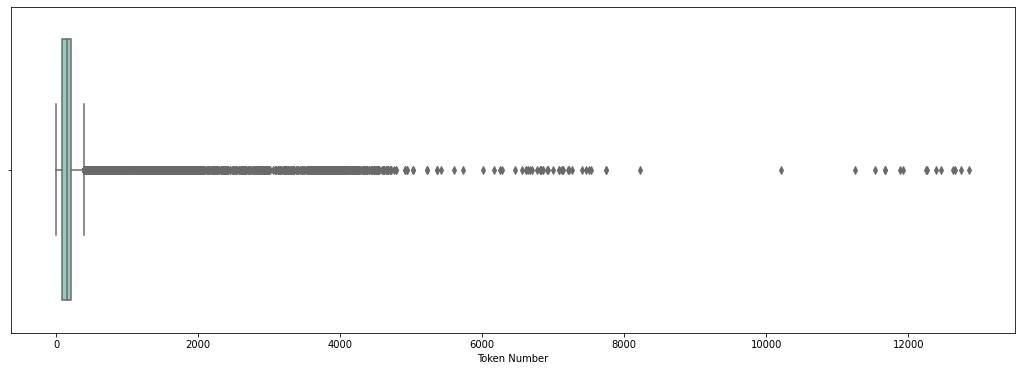

In [23]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (18,6)

sns.boxplot(x=processed_dist['Token Number'], palette="Set3")
plt.xticks(np.arange(token_min, token_max, step=int(token_max // 20)), \
           ["{}".format(int(x)) for x in np.arange(token_min, token_max, step=int(token_max // 20))])
plt.show()

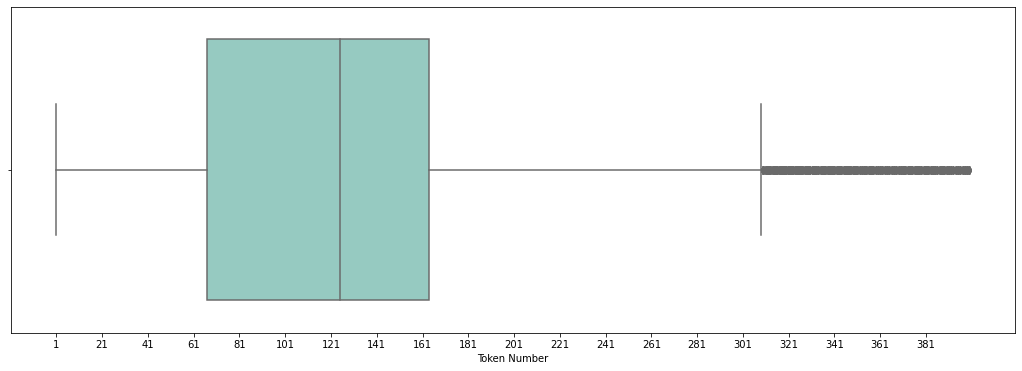

In [341]:
import seaborn as sns

token_len_filter = (processed_dist['Token Number'] <= 400) & (processed_dist['Token Number'] >= 0)

plt.rcParams["figure.figsize"] = (18,6)

token_min = int(np.min(processed_dist[token_len_filter]['Token Number']))
token_max = int(np.max(processed_dist[token_len_filter]['Token Number']))

sns.boxplot(x=processed_dist[token_len_filter]['Token Number'], palette="Set3")
plt.xticks(np.arange(token_min, token_max, step=int(token_max // 20)), \
           ["{}".format(int(x)) for x in np.arange(token_min, token_max, step=int(token_max // 20))])
plt.show()

Token Distribution : 1 ~ 12861
Token Distribution Mean : 232.953

Variance : 290343.55 
Standard Devidation: 538.84

Skew : 9.36 
Kurt : 127.16
95% Confidence Interval : 127.34 ~ 338.57
90% Confidence Interval : 144.31 ~ 321.59


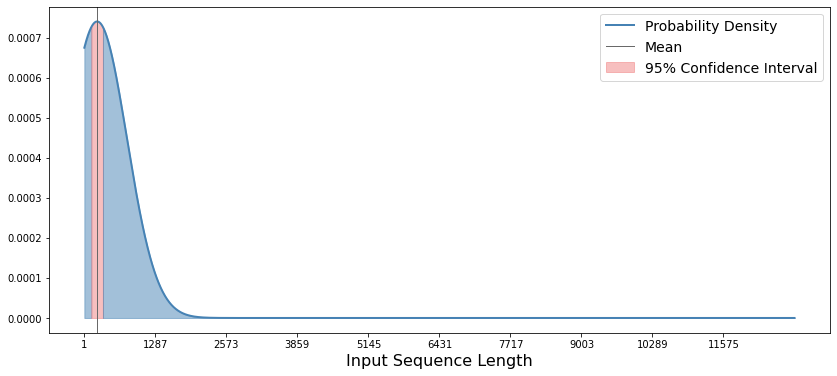

In [44]:
token_len_filter = processed_dist['Token Number'] >= 0 

token_min = int(np.min(processed_dist[token_len_filter]['Token Number']))
token_max = int(np.max(processed_dist[token_len_filter]['Token Number']))

token_var = np.var(processed_dist[token_len_filter]['Token Number'])
token_std = np.std(processed_dist[token_len_filter]['Token Number'])
token_mean = np.mean(processed_dist[token_len_filter]['Token Number'])

token_skew = processed_dist[token_len_filter]['Token Number'].skew()
token_kurt = processed_dist[token_len_filter]['Token Number'].kurt()

print("Token Distribution : {} ~ {}".format(token_min, token_max))
print("Token Distribution Mean : {:.3f}\n".format(token_mean))
print("Variance : {:.2f} \nStandard Devidation: {:.2f}\n".format(token_var, token_std))
print("Skew : {:.2f} \nKurt : {:.2f}".format(token_skew, token_kurt))

x = sorted(processed_dist[token_len_filter]['Token Number'])
norm_dist = stats.norm(token_mean, token_std)

L_95 = token_mean - 1.96*(token_std/np.sqrt(100))
U_95 = token_mean + 1.96*(token_std/np.sqrt(100))
print("95% Confidence Interval : {:.2f} ~ {:.2f}".format(L_95, U_95))

L_90 = token_mean - 1.645*(token_std/np.sqrt(100))
U_90 = token_mean + 1.645*(token_std/np.sqrt(100))
print("90% Confidence Interval : {:.2f} ~ {:.2f}".format(L_90, U_90))

pdf_line, = plt.plot(x, norm_dist.pdf(x), color='steelblue', linewidth=2)

mean_line = plt.axvline(x=token_mean, color='dimgray', linewidth=1)

plt.fill_between(np.arange(token_min , L_95).tolist(), 
                 [norm_dist.pdf(i) for i in np.arange(token_min , L_95)], alpha=0.5, color='steelblue') 
confidence_area=plt.fill_between(np.arange(L_95 , U_95).tolist(), 
                 [norm_dist.pdf(i) for i in np.arange(L_95 , U_95)], alpha=0.5, color='lightcoral')
plt.fill_between(np.arange(U_95 , token_max).tolist(), 
                 [norm_dist.pdf(i) for i in np.arange(U_95 , token_max)], alpha=0.5, color='steelblue') 

plt.rcParams["figure.figsize"] = (14,6)
# plt.title("Input Sequence Length Distribution", fontsize=18)
plt.xticks(np.arange(token_min, token_max, step=int(token_max // 10)), \
           ["{}".format(int(x)) for x in np.arange(token_min, token_max, step=int(token_max // 10))])

plt.xlabel('Input Sequence Length', fontsize=16)
# plt.grid(axis = 'x')
plt.legend(handles=(pdf_line, mean_line, confidence_area), labels=('Probability Density', "Mean", "95% Confidence Interval"), fontsize=14)
plt.savefig('entire_sequence_dist.png')

plt.show()

Token Distribution : 1 ~ 340
Token Distribution Mean : 134.643

Variance : 5152.80 
Standard Devidation: 71.78

Skew : 0.32 
Kurt : -0.60
95% Confidence Interval : 120.57 ~ 148.71


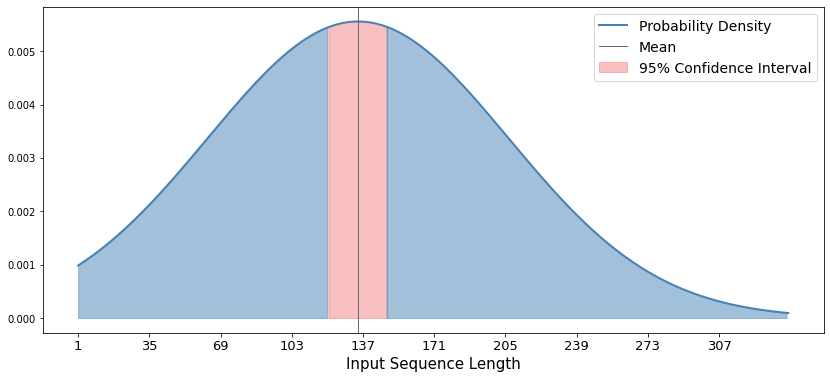

In [47]:

token_len_filter = processed_dist['Token Number'] >= 0 
token_len_filter = (processed_dist['Token Number'] <= 250) & (processed_dist['Token Number'] >= 10)

token_min = int(np.min(processed_dist[token_len_filter]['Token Number']))
token_max = int(np.max(processed_dist[token_len_filter]['Token Number']))

token_var = np.var(processed_dist[token_len_filter]['Token Number'])
token_std = np.std(processed_dist[token_len_filter]['Token Number'])
token_mean = np.mean(processed_dist[token_len_filter]['Token Number'])

token_skew = processed_dist[token_len_filter]['Token Number'].skew()
token_kurt = processed_dist[token_len_filter]['Token Number'].kurt()

print("Token Distribution : {} ~ {}".format(token_min, token_max))
print("Token Distribution Mean : {:.3f}\n".format(token_mean))
print("Variance : {:.2f} \nStandard Devidation: {:.2f}\n".format(token_var, token_std))
print("Skew : {:.2f} \nKurt : {:.2f}".format(token_skew, token_kurt))

x = sorted(processed_dist[token_len_filter]['Token Number'])
norm_dist = stats.norm(token_mean, token_std)

L_95 = token_mean - 1.96*(token_std/np.sqrt(100))
U_95 = token_mean + 1.96*(token_std/np.sqrt(100))

print("95% Confidence Interval : {:.2f} ~ {:.2f}".format(L_95, U_95))

pdf_line, = plt.plot(x, norm_dist.pdf(x), color='steelblue', linewidth=2)

# plt.vlines(L_95, 0, norm_dist.pdf(L_95), color='lightcoral', linestyle='--', linewidth=2)
# plt.vlines(U_95, 0, norm_dist.pdf(U_95), color='lightcoral', linestyle='--', linewidth=2)

mean_line = plt.axvline(x=token_mean, color='dimgray', linewidth=1)

# confidence_line_95 = plt.axvline(L_95, color='r', linestyle='--', linewidth=1)
# confidence_line_95 = plt.axvline(U_95, color='r', linestyle='--', linewidth=1)

plt.fill_between(np.arange(token_min , L_95).tolist(), 
                 [norm_dist.pdf(i) for i in np.arange(token_min , L_95)], alpha=0.5, color='steelblue') 
confidence_area = plt.fill_between(np.arange(L_95 , U_95).tolist(), 
                 [norm_dist.pdf(i) for i in np.arange(L_95 , U_95)], alpha=0.5, color='lightcoral')
plt.fill_between(np.arange(U_95-.5 , token_max).tolist(), 
                 [norm_dist.pdf(i) for i in np.arange(U_95-.5 , token_max)], alpha=0.5, color='steelblue') 

plt.rcParams["figure.figsize"] = (14,6)
# plt.title("Input Sequence Length Distribution",fontsize=18)

x_range = np.arange(token_min, token_max, step=int(token_max // 10))
plt.xticks(x_range, \
           ["{}".format(int(x)) for x in x_range], fontsize=13)

plt.xlabel('Input Sequence Length', fontsize=15)
# plt.grid(axis = 'x')
# plt.legend(handles=(pdf_line, mean_line, confidence_line), labels=('PDF', "Mean", "95% Confidencee Interval"))
plt.legend(handles=(pdf_line, mean_line, confidence_area), labels=('Probability Density', "Mean", "95% Confidence Interval"), fontsize=14)
plt.savefig('sequence_dist.png')
plt.show()

In [23]:
MAX_LINE = 13

In [32]:
split_by_max_len = lambda sents : [sents[idx*MAX_LINE : idx*MAX_LINE + MAX_LINE] for idx in range(math.ceil(len(sents) / MAX_LINE))]

if __name__ == '__main__':
    
    article_dist = pd.DataFrame(columns=['Title', 'Media', 'Line length', 'Token Number'])
    for idx, media_path in enumerate(iglob(os.path.join(ORIGIN_PATH, '**.csv'), recursive=False)):

        media_name = get_media_name(media_path)
        
        f = open(media_path, 'r', newline="\n", encoding="utf-8")
        rdr = csv.reader(f)
        for [title, contents] in rdr:
            article = Article(title, media_name, contents.split("\t"))
            if len(article.content) < 3: continue # 본문이 3줄 미만인 경우 제외
            
            contents = list(article.readContent())
            for idx, cont in enumerate(split_by_max_len(contents)):
                if len(cont) < 3: continue 
                    
                dist= {'Title' : article.title + "--{}".format(idx), 'Media' : article.media, \
                       'Line length' : len(cont) , 'Token Number' : get_token_count(cont)}
                article_dist = article_dist.append(dist, ignore_index=True)

In [33]:
article_dist['Line length'] = article_dist['Line length'].astype('float64')
article_dist['Token Number'] = article_dist['Token Number'].astype('float64')

In [35]:
display(pd.DataFrame(article_dist))

,Title,Media,Line length,Token Number
0,이태원 클럽발 확진자 계속 증가…각 지자체 추가 행정명령--0,KBS,13.0,160.0
1,이태원 클럽발 확진자 계속 증가…각 지자체 추가 행정명령--1,KBS,7.0,95.0
2,인도 남부서 버스-트럭 충돌로 40여명 사상--0,KBS,5.0,67.0
3,민경욱 “선관위가 ‘여론 조작’ 시도…개표시연 못 믿어”--0,KBS,12.0,231.0
4,미 ‘목 누르기’ 체포 금지 요구 확산…샌디에이고 “즉각 중단”--0,KBS,13.0,233.0
...,...,...,...,...
61455,"아동학대로 한해 30명 넘게 사망 ""범죄를 왜 복지부가 맡나""--1",중앙일보,9.0,136.0
61456,"유치장서 칫솔 삼킨 남성, 이번엔 3m 담 뛰어내려 허리 부상--0",중앙일보,7.0,97.0
61457,"이언주 측 ""배우자가 선거운동 중 멱살잡이 폭행당했다"" 신고--0",중앙일보,6.0,105.0
61458,"홍콩 ""복면금지법"" 부활…""집회서 마스크 쓰면 징역 최대 1년""--0",중앙일보,13.0,242.0


Line Count : 3.0 ~ 13.0


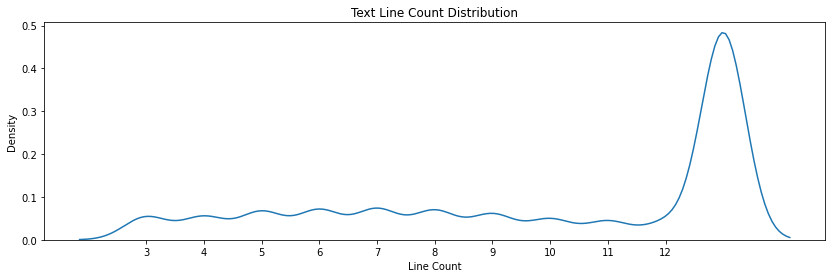

In [34]:
line_min = np.min(article_dist['Line length'])
line_max = np.max(article_dist['Line length'])

print("Line Count : {line_min} ~ {line_max}".format(line_max=line_max, line_min=line_min))
sns.kdeplot(article_dist['Line length'])

plt.rcParams["figure.figsize"] = (14,4)
plt.title("Text Line Count Distribution")
plt.xticks(np.arange(line_min, line_max, step=int(line_max // 13)), \
           ["{}".format(int(x)) for x in np.arange(line_min, line_max, step=int(line_max // 13))])
plt.xlabel('Line Count')
plt.show()

대다수의 토큰의 개수가 300개 이내임을 확인할 수 있다.  
이 이상의 토큰 수를 가지는 기사를 제외할 것이다.

Token Count : 3.0 ~ 906.0


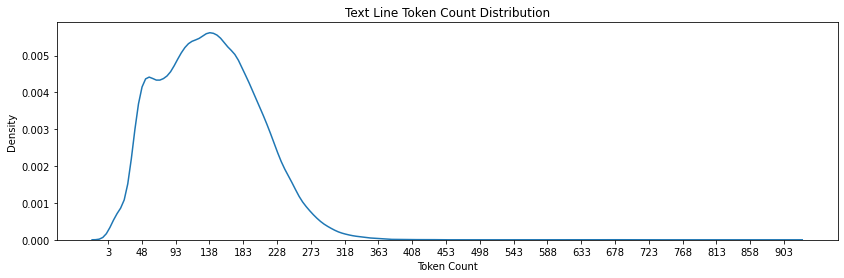

In [36]:
token_min = np.min(article_dist['Token Number'])
token_max = np.max(article_dist['Token Number'])

line_len_filter = article_dist['Line length'] <= 13
print("Token Count : {token_min} ~ {token_max}".format(token_min=token_min, token_max=token_max))

sns.kdeplot(article_dist[line_len_filter]['Token Number'])

plt.rcParams["figure.figsize"] = (14,4)
plt.title("Text Line Token Count Distribution")
plt.xticks(np.arange(token_min, token_max, step=int(token_max // 20)), \
           ["{}".format(int(x)) for x in np.arange(token_min, token_max, step=int(token_max // 20))])
plt.xlabel('Token Count')
plt.show()